In [1]:
#借助 Intel(R) Extension for Scikit-learn，您可以加速您的 Scikit-learn 应用程序，并且仍然完全符合所有 Scikit-Learn API 和算法。这是一款免费软件 AI 加速器，可为各种应用带来超过10-100 倍的加速。而且您甚至不需要更改现有代码！
# !python -m pip install pandas matplotlib scikit-learn-intelex scikit-learn openpyxl tensorboard seaborn ipykernel ipywidgets keras plotly plotly_express
# !python -m pip install  tensorflow==2.15.*
# !python -m pip install  tensorflow[and-cuda]==2.15.*
#


In [2]:
# 本导入顺序可以看到类型
import tensorflow as tf
import keras
# import tensorflow_datasets as tfds
import datetime
import os
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
from sklearn import preprocessing as skl
from sklearn.model_selection import train_test_split

# from tensorflow import keras

from keras import layers
from keras import models



patch_sklearn()
# from attention_utils import get_activations

#更好地兼容 Python 3 的行为和特性，使得代码可以在 Python 2 和 Python 3 下运行得更加一致
# from __future__ import absolute_import,division,print_function,unicode_literals
from matplotlib import pyplot as plt
from matplotlib import ticker as mt
# 或者直接指定字体文件路径
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans Mono']  # 系统自带的黑体
plt.rcParams['font.serif'] = ['SimHei']  # 系统自带的宋体
plt.rcParams['font.family'] = [
    'SimHei',
    'DejaVu Sans Mono',  # 显示负号的字体
    # 'Liberation Mono',
    'Consolas',
    'Courier New',
    'monospace',
    'sans-serif',
    'serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
]
plt.rcParams['axes.unicode_minus'] = False  # 设置matplotlib显示正常的负号而非减号样式

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
print(' ')
print(f'{datetime.datetime.now()} tensorflow版本:', tf.__version__)
gpus = tf.config.experimental.list_physical_devices("GPU")
print(' ')
print('gpus： ')
print(gpus)
print(' ')
print('gpus')
# 查看系统中可见的GPU设备
print("Available GPU devices:", tf.config.list_physical_devices("GPU"))


 
2024-04-15 17:53:37.825184 tensorflow版本: 2.16.1
 
gpus： 
[]
 
gpus
Available GPU devices: []


In [4]:
# # 读取数据

from load_data import load_fixed_data, categories

R_CREATE = False
R_CREATE = True


def create_dynamic_globals(dyn_name, value, global_vars, read_cache: bool = True):
    """
    :param dyn_name: 动态变量名
    :param value: 动态变量值
    :param global_vars: 全局变量字典
    :return:
    """
    # print(dyn_name, global_vars[dyn_name])
    if read_cache and (R_CREATE or dyn_name not in global_vars or global_vars[dyn_name] == None):
        # 如果确实需要在全局作用域创建真正的全局变量，可以使用exec，但这不是推荐做法
        if callable(value):

            v = value(dyn_name)
            s = f'global {dyn_name}; {dyn_name} = v'
            # print(s)
            exec(s)
        else:
            exec(f'global {dyn_name}; {dyn_name} = {value}')

    return globals()[dyn_name]


def create_global_vars(global_vars, varprefix: str = 'data_', read_cache: bool = True):

    for gvar in global_vars:
        #
        if gvar.startswith('_'):
            continue
        if gvar.startswith(varprefix):
            print(gvar, )
            create_dynamic_globals(gvar, lambda f: load_fixed_data(f'./data/{f}.xlsx'), global_vars)


data_17 = pd.DataFrame()
data_21 = data_17
data_22 = data_17
data_23 = data_17
data_24 = data_17

create_global_vars(globals(), varprefix='data_')

# data_17.dtypes

data_17
data_21
data_22
data_23
data_24


In [5]:
from libs.config import *

In [6]:
#组合数据集
from load_data import categories

numeric_col_names = [
    '原始重量', '稳定重量', '轴重', 'su_ad', 'wpu_x', 'wpu_y', 'wpu_z', 'su_x', 'su_y', 'su_z', '原始重量_diff', '稳定重量_diff', '轴重_diff', 'su_ad_diff', 'wpu_x_diff', 'wpu_y_diff', 'wpu_z_diff', 'su_x_diff', 'su_y_diff', 'su_z_diff', '速度', '估计重量'
]
# delete some
# ['Unnamed: 0' ,
# 'label'      , '时间'         , '轨迹时间'       , '速度',, '估计重量'
# '原始重量'       , '稳定重量'       , '轴重'         , 'su_ad',
# '原始重量_diff'  , '稳定重量_diff'  , '轴重_diff'    , 'su_ad_diff',
# 'wpu_x'      , 'wpu_y'      , 'wpu_z'      ,
# 'wpu_x_diff' , 'wpu_y_diff' , 'wpu_z_diff',
# 'su_x'       , 'su_y'       , 'su_z'       ,
# 'su_x_diff'  , 'su_y_diff'  , 'su_z_diff'
# ]
label_col_names = ["label"]
time_col_names = ["时间", "轨迹时间"]
feature_col_names = numeric_col_names  # 暂时去掉 时间
feature_col_num = len(feature_col_names)

class_num = len(categories)


all_col_names = numeric_col_names + label_col_names + time_col_names
df17, df21, df22, df23, df24 = data_17[all_col_names], data_21[all_col_names], data_22[all_col_names], data_23[all_col_names], data_24[all_col_names]
origindata = pd.concat([df17, df21, df22, df23, df24], axis=0, ignore_index=True)

# print(origindata.columns)

print(origindata.shape, origindata.columns, origindata.dtypes)

(107420, 25) Index(['原始重量', '稳定重量', '轴重', 'su_ad', 'wpu_x', 'wpu_y', 'wpu_z', 'su_x',
       'su_y', 'su_z', '原始重量_diff', '稳定重量_diff', '轴重_diff', 'su_ad_diff',
       'wpu_x_diff', 'wpu_y_diff', 'wpu_z_diff', 'su_x_diff', 'su_y_diff',
       'su_z_diff', '速度', '估计重量', 'label', '时间', '轨迹时间'],
      dtype='object') 原始重量                   int64
稳定重量                   int64
轴重                     int64
su_ad                  int64
wpu_x                  int64
wpu_y                  int64
wpu_z                  int64
su_x                   int64
su_y                   int64
su_z                   int64
原始重量_diff              int64
稳定重量_diff              int64
轴重_diff                int64
su_ad_diff             int64
wpu_x_diff             int64
wpu_y_diff             int64
wpu_z_diff             int64
su_x_diff              int64
su_y_diff              int64
su_z_diff              int64
速度                   float64
估计重量                 float64
label                  int64
时间            date

In [7]:
# check 数据集有缺失值
shapea= origindata.shape
df = origindata.dropna()
shapeb =df.shape
print(shapea, shapeb)
if shapea != shapeb:
    print(shapea,shapeb)
    ValueError("数据集有缺失值")

# missing_values

(107420, 25) (107420, 25)


In [8]:
import pandas as pd

# 假设df是一个时间序列DataFrame，其中索引是时间戳
if not '时间' in df.index.names or not isinstance(df.index, pd.DatetimeIndex):
    df.sort_values('时间', axis=0, ascending=True)
    df.set_index('时间', inplace=True)  # 如果还没有将时间戳设为索引
    df = df.sort_index(axis=0, ascending=True)
# df.interpolate(method='linear', inplace=True)
# 确保索引已经是datetime类型
# df.index = pd.to_datetime(df.index)

# 计算相邻时间点之间的差值
time_diffs = df.index.to_series(name='timespan').diff()
print(time_diffs)
# 找出那些间隔超过3秒的索引
large_gaps = time_diffs[time_diffs > pd.Timedelta(seconds=6)].index
print(large_gaps)
# 若要查看每段连续的间隔超过3秒的区间
gaps_df = pd.DataFrame({'start': large_gaps[:-1], 'end': large_gaps[1:]})
# 若只需要每个间隔的开始时间
gap_starts = large_gaps[:-1]

print("间隔超过3秒的开始时间点：", gap_starts)
time_diffs

时间
2023-12-17 09:39:23               NaT
2023-12-17 09:39:26   0 days 00:00:03
2023-12-17 09:39:30   0 days 00:00:04
2023-12-17 09:39:32   0 days 00:00:02
2023-12-17 09:39:35   0 days 00:00:03
                            ...      
2023-12-24 08:27:37   0 days 00:00:03
2023-12-24 08:27:40   0 days 00:00:03
2023-12-24 08:27:43   0 days 00:00:03
2023-12-24 08:27:46   0 days 00:00:03
2023-12-24 08:27:49   0 days 00:00:03
Name: timespan, Length: 107420, dtype: timedelta64[ns]
DatetimeIndex(['2023-12-17 09:40:23', '2023-12-17 09:41:38',
               '2023-12-17 09:44:20', '2023-12-17 09:55:29',
               '2023-12-17 10:34:53', '2023-12-17 10:36:20',
               '2023-12-17 10:40:27', '2023-12-17 10:47:24',
               '2023-12-17 10:53:02', '2023-12-17 10:53:24',
               ...
               '2023-12-23 17:13:36', '2023-12-23 17:14:55',
               '2023-12-23 17:16:18', '2023-12-23 17:17:34',
               '2023-12-23 17:18:42', '2023-12-23 17:20:13',
               '2

时间
2023-12-17 09:39:23               NaT
2023-12-17 09:39:26   0 days 00:00:03
2023-12-17 09:39:30   0 days 00:00:04
2023-12-17 09:39:32   0 days 00:00:02
2023-12-17 09:39:35   0 days 00:00:03
                            ...      
2023-12-24 08:27:37   0 days 00:00:03
2023-12-24 08:27:40   0 days 00:00:03
2023-12-24 08:27:43   0 days 00:00:03
2023-12-24 08:27:46   0 days 00:00:03
2023-12-24 08:27:49   0 days 00:00:03
Name: timespan, Length: 107420, dtype: timedelta64[ns]

In [9]:
from turtle import up
import scipy
from scipy.stats import iqr

p = 1.5


def replace_iqr_outliers(df: pd.DataFrame, colums: list[str]):
    q = 0.25
    _df = df.copy()
    for column in colums:
        _df[column] = _df[column].astype(float)
        q1 = _df[column].quantile(q)  #.quantile(0.25)
        q3 = _df[column].quantile(1 - q)  #.quantile(0.75)
        iqr_value = iqr(_df[column], rng=(q * 100, (1 - q) * 100))
        print('------', iqr_value)

        lower_bound = q1 - p * iqr_value
        upper_bound = q3 + p * iqr_value
        _df.loc[_df[column] < lower_bound, column] = lower_bound
        _df.loc[_df[column] > upper_bound, column] = upper_bound

    return _df


df_iqr = replace_iqr_outliers(origindata, numeric_col_names)

# df_iqr


------ 8295.0
------ 0.0
------ 8295.0
------ 745.0
------ 1635.0
------ 814.25
------ 1674.0
------ 1148.0
------ 796.0
------ 1006.0
------ 312.0
------ 0.0
------ 312.0
------ 28.0
------ 23.0
------ 26.0
------ 23.0
------ 10.0
------ 10.0
------ 10.0
------ 0.0
------ 0.0


In [10]:
from libs.expandrows import dataframe_filter

df_filter_important = df_iqr  #全部数据

# df_filter_important = dataframe_filter(df_iqr, 30)  # 过滤为0的数据

# df_filter_important

In [11]:
# 使用Savitzky-Golay 滤波器后得到平滑图线
from numpy import ndarray
from scipy import signal as sg

# df_expanded = df_expanded  #.dropna()
for col in df_filter_important[numeric_col_names].columns:
    a = 1
    # df_selected.insert(0,co)
    # df_selected[col] = sg.savgol_filter(df_selected[col].astype(float), window_length=21, delta=0.5, polyorder=1, mode='constant')
    # df_selected[col] = np.convolve(df_selected[col].astype(float), np.ones((5, )), mode='same')
    # df_selected[col] = abs(df_selected[col].astype(float))
    # df_selected[col] = np.convolve(df_selected[col].astype(float), np.ones((5, )), mode='same')

# df_selected.sort_index(axis=1)

# df_selected = df_selected.apply(lambda x: savgol_filter(x, 5, 3, mode= 'nearest'))
#[feature_col_names + label_col_names]

df_smooth = df_filter_important[feature_col_names + label_col_names + time_col_names]


In [12]:
# !python -m pip install plotly plotly_express chart-studio cufflinks pyarrow
import plotly_express as px  # import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots
# Cufflinks wrapper on plotly
import cufflinks as cf


# print(df['时间'].shape, df[feature_col_names].shape)
# fig = px.line(df, x='时间', y=feature_col_names + label_col_names,range_x=['2023-12-24 00:00:00', '2023-12-24 09:00:00'])
# fig.show()

In [13]:
# 假设你有多个列需要比较
columns_to_plot = feature_col_names + label_col_names
# df_smooth.reset_index()
df_to_plot = df_smooth[columns_to_plot]
# dfview.reset_index(drop=True, inplace=True)
# df_to_plot

In [14]:
# 归一化函数
def normalize(inpudf: pd.DataFrame, numeric_col_names: list[str]) -> np.ndarray:
    # 使用 StandardScaler 或者 MinMaxScaler 进行标准化处理。
    # 创建标准化器对象
    scaler = skl.MinMaxScaler()
    return scaler.fit_transform(inpudf)
    # for col in numeric_col_names :
    #     result[col]=scaler.fit_transform(np.asarray(inpudf[col] ))


# def normalizeY(y: pd.DataFrame):
#     """对df中的数值列进行反标准化处理"""
#     # 定义一个字典，将标签映射到整数值
#     custom_label_dict = {    '-': 0, '卸': 1, '装': 2, }
#     le = OneHotEncoder(categories='auto', sparse=False)
#     print('mapping ---->',custom_label_dict)
#     # 现在我们可以将ydata转换为数值
#     ydata_numeric = y.apply(lambda x: custom_label_dict[x['label']],axis=1)
#     return ydata_numeric
def normalizeY(y: pd.DataFrame):
    """对df中的数值列进行反标准化处理"""
    # 定义一个字典，将标签映射到整数值
    ydata = np.asarray(y[label_col_names])
    le = skl.OneHotEncoder()
    le.fit(ydata)

    return le.transform(ydata), le


In [15]:
# 准备数据


def windowed_dataset(dataset: tf.data.Dataset, window_size=5, shift=1, stride=1):
    windows = dataset.window(window_size, shift=shift, stride=stride, drop_remainder=True)

    def sub_to_batch(t1, t2=None):
        t1_batches = t1.batch(window_size, drop_remainder=True)

        if t2 is not None:
            t2_batches = t2.batch(window_size, drop_remainder=True)
            return tf.data.Dataset.zip(t1_batches, t2_batches)
        else:
            return t1_batches

    windows = windows.flat_map(sub_to_batch)
    return windows


In [16]:
from libs.class_weight import generate_class_weights


def one_hot_encoding(label):
    return tf.squeeze(tf.one_hot(label, depth=class_num))
    # print(label)
    # return label * 100


y = tf.data.Dataset.from_tensor_slices(df_filter_important[label_col_names].astype(int)).map(one_hot_encoding)

# test_weight = generate_class_weights(list(y), multi_class=True, one_hot_encoded=True)

test_weight = {0: 0.3434428692922046, 1: 32.374924653405664, 2: 17.415693904020753}


# y1 = df_filter_important[label_col_names].iloc[:, 0].tolist()
# test_weight1 = generate_class_weights(y1, multi_class=True, one_hot_encoded=False)
# print(test_weight1)
# y1

In [17]:

from joblib import dump, load

# 使用map函数对不同特征列进行相应的归一化
# normalized_dataset = dataset.map(
#     lambda feats: {
#         'feature1': normalize_feature1(feats['feature1']),
#         'feature2': normalize_feature2(feats['feature2']),
#     })
# for col in feature_col_names:
#     df_selected[col] =scaler.fit_transform(df_selected[col])

scaler = skl.StandardScaler()

normalized = scaler.fit_transform(df_filter_important[feature_col_names])

# save scaler
dump(scaler, 'scaler.joblib')

# load scaler
loaded_scaler = load('scaler.joblib')




In [18]:
x = tf.data.Dataset.from_tensor_slices(normalized)

featureTarget = x
featureTarget = windowed_dataset(x, time_steps)

target = tf.data.Dataset.zip(featureTarget, y).batch(batch_size)

total_examples = len(x)  # 获取数据集总样本数
train_ratio = 0.6  # 训练集占比
num_train_examples = int(total_examples * train_ratio)
num_val_examples = total_examples - num_train_examples
train_dataset = target.take(num_train_examples)
val_dataset = target.skip(num_train_examples).take(num_val_examples)

trainWindow = train_dataset.batch(batch_size=batch_size, drop_remainder=True)
valWindow = val_dataset.batch(batch_size=batch_size, drop_remainder=True)

print('test_weight=======================')
print(test_weight)

# for a, b in trainWindow.take(1):
#     print('x=======================')
#     print(a.numpy())
#     print('y---------------------')
#     print(b.numpy())
for a, b in trainWindow.take(1):
    print('a =======================')
    print(a.shape)
    print(a.numpy())
    print('b---------------------')
    print(b.shape)
    print(b.numpy())
# yview=np.array(list(y))
# yview = list(y)
# normalized
# print(yview)

test_weight=======================
{0: 0.3434428692922046, 1: 32.374924653405664, 2: 17.415693904020753}
a =======================
(200, 200, 3, 22)
[[[[ 0.11858524  0.          0.08030263 ... -0.02519509  0.
     0.        ]
   [ 0.10487709  0.          0.08164869 ... -0.02519509  0.
     0.        ]
   [ 0.05591942  0.          0.06671966 ...  0.46726393  0.
     0.        ]]

  [[ 0.10487709  0.          0.08164869 ... -0.02519509  0.
     0.        ]
   [ 0.05591942  0.          0.06671966 ...  0.46726393  0.
     0.        ]
   [ 0.08590599  0.          0.07761051 ...  0.56575573  0.
     0.        ]]

  [[ 0.05591942  0.          0.06671966 ...  0.46726393  0.
     0.        ]
   [ 0.08590599  0.          0.07761051 ...  0.56575573  0.
     0.        ]
   [ 0.07219785  0.          0.06806572 ... -1.10860492  0.
     0.        ]]

  ...

  [[ 0.04502634  0.          0.01348911 ... -0.02519509  0.
     0.        ]
   [-0.00540006  0.          0.05436039 ... -0.02519509  0.
     0. 

In [19]:
# 编译模型
# %reload_ext autoreload
# %autoreload 2
from libs.callbacks import get_callbacks
from libs.compile_model import compile_model

model = compile_model(time_steps, feature_col_num, class_num, total_examples, batch_size)
initial_learning_rate = 0.01
callbacks = get_callbacks(initial_learning_rate)

tensorboard --logdir="c:\AppData\code-ai\CNN-LSTM-Attention\model_output\logs_20240415-175338" --host=127.0.0.1


In [20]:

history = model.fit(
    target,
    epochs=epochs,
    verbose='auto',
    batch_size=batch_size,
    # validation_data=valWindow,
    # validation_split=0.2,
    # shuffle=False,
    callbacks=callbacks,
    class_weight=test_weight,
    # workers=10
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/5
    196/Unknown 92s 438ms/step - accuracy: 0.6912 - categorical_crossentropy: 19.0508 - loss: 326.8800

KeyboardInterrupt: 

In [20]:
# %load_ext tensorboard
# %tensorboard --logdir "./logs"
# cmd 当前环境，当前目录 运行   tensorboard --logdir=logs --host=127.0.0.1
# 网页中可以查看模型训练过程

In [21]:
print(history)

[0.9164054989814758, 0.8646166324615479, 0.797483503818512, 0.775840163230896, 0.7905793190002441] accuracy
[9.684135437011719, 2.7077417373657227, 2.3989949226379395, 1.1551389694213867, 0.7495574355125427] categorical_crossentropy
[85.96939086914062, 4.740684509277344, 4.013179779052734, 1.7616088390350342, 1.6022045612335205] loss
[0.9669055938720703, 0.9669055938720703, 0.9669055938720703, 0.9669055938720703, 0.9669055938720703] val_accuracy
[0.3690681457519531, 0.6681406497955322, 0.33484983444213867, 0.5541481971740723, 0.17543666064739227] val_categorical_crossentropy
[0.549004316329956, 1.7282235622406006, 0.36907219886779785, 0.5618320107460022, 0.19861234724521637] val_loss
[0.009999999776482582, 0.009600000455975533, 0.009216000325977802, 0.00884735956788063, 0.00849346537142992] learning_rate


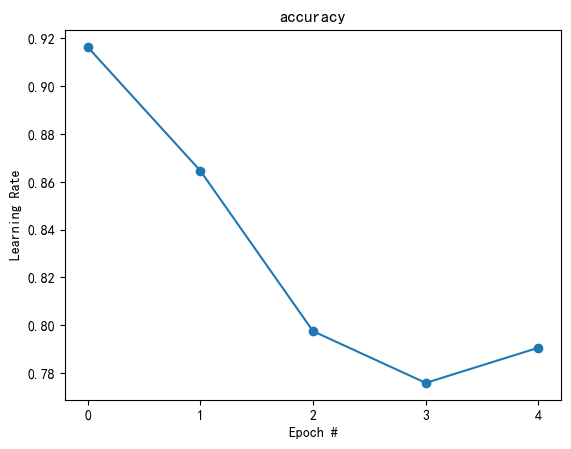

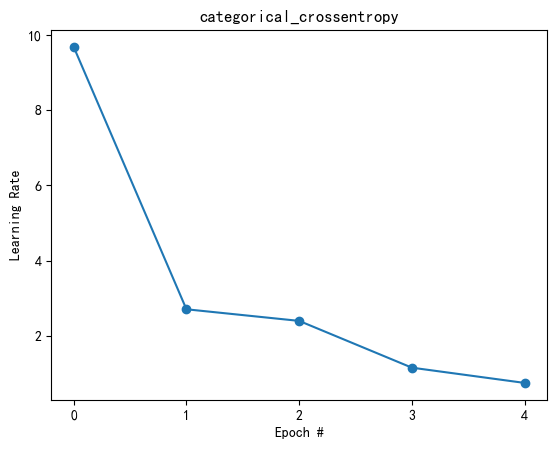

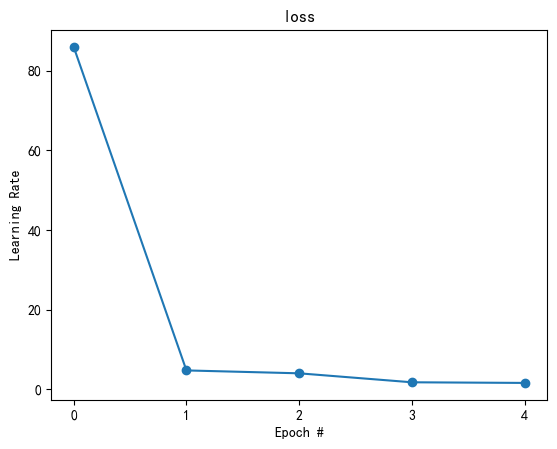

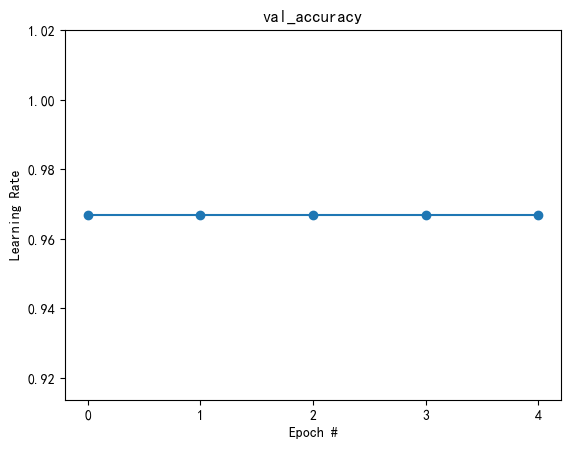

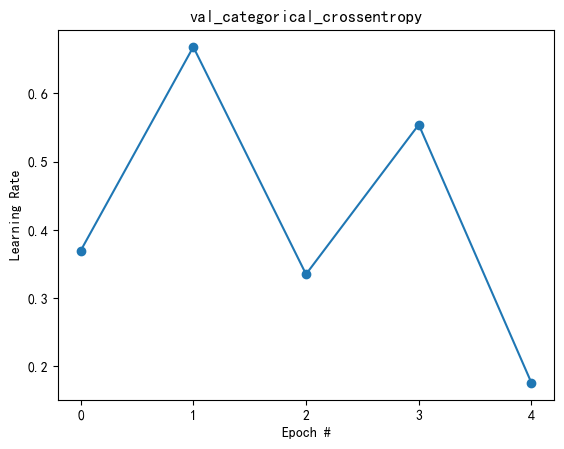

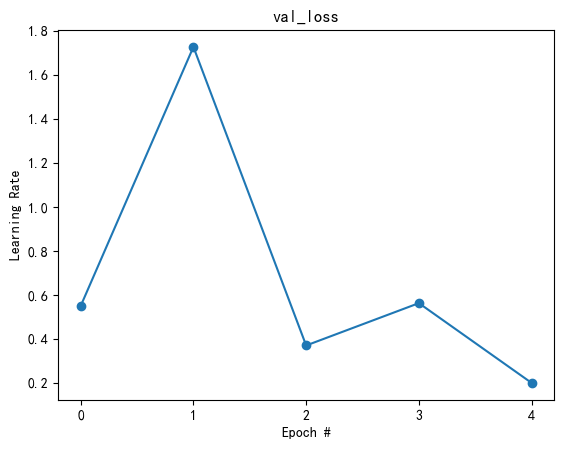

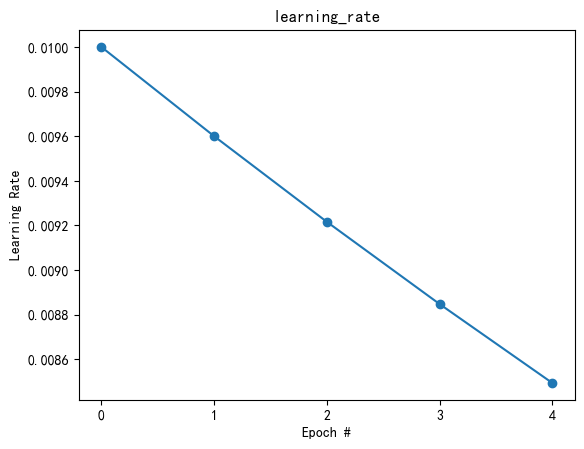

In [22]:
H = history


#画学习率变化曲线并保存到log中
def plot(lrs, title="Learning Rate Schedule"):
    #计算学习率随epoch的变化值
    epochs = np.arange(len(lrs))
    plt.figure()
    plt.plot(epochs, lrs)
    plt.xticks(epochs)
    plt.scatter(epochs, lrs)
    plt.title(title)
    plt.xlabel("Epoch #")
    plt.ylabel("Learning Rate")


for k, v in H.history.items():
    print(v, k)
    plot(v,k)
plt.savefig(os.path.join(log_dir, 'learning_rate.png'))

In [23]:
# 保存模型结构及配置参数
model_json = model.to_json()
with open(os.path.join(log_dir,'model_json.json'),'w') as json_file:
    json_file.write(model_json)


In [24]:
#对模型在测试集上进行评估
metrics = model.evaluate(valWindow, verbose=1)
print("val_loss:", metrics[0], "val_accuracy:", metrics[1])


21483/21483 ━━━━━━━━━━━━━━━━━━━━ 103s 5ms/step - accuracy: 0.9750 - categorical_crossentropy: 0.2758 - loss: 0.4556
val_loss: 0.549004316329956 val_accuracy: 0.9669055938720703


In [25]:
predictions=model.predict(valWindow,verbose=1)
predictions?

21483/21483 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step


Type:        ndarray
String form:
[[9.9955338e-01 4.5943594e-08 4.4656577e-04]
           [9.9955338e-01 4.5943416e-08 4.4656533e-04]
           [9.995 <...> 5e-04]
           [9.9955338e-01 4.5942890e-08 4.4656236e-04]
           [9.9955338e-01 4.5943068e-08 4.4656277e-04]]
Length:      42966
File:        c:\appdata\.devhome\conda\envs\py311tf2.16\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more in

In [26]:
# 如果是多分类问题并且想比较类别概率分布
# 假设y_true和y_pred都是one-hot编码形式
# 可以选择几个样本画柱状图对比


y_true = valWindow.map(lambda x, y: v)
for i, v in enumerate(y_true):
    if i > 3:
        break
    
    print(v)
# print(predictions)
y_pred = tf.argmax(predictions)
# for i in y_pred:
#     # print(i)
#     # print(i)
#     e=1
# num_samples_to_plot = len(y_pred)
# nrows = 2
# plt.figure(figsize=(30, 6))
# plt.subplot(nrows, 1, 1)
# plt.plot(y_true, label='Actual values', linewidth=1.0)
# plt.subplot(nrows, 1, 2)
# plt.plot(y_pred, label='Predicted values', linewidth=1.0)
# plt.legend(fontsize=14)
# plt.xlabel('Sample Index')
# ax = plt.gca()
# ax.set_xlim(left=0, right=num_samples_to_plot)
# plt.ylabel('Value')
# plt.title('Actual vs Predicted Values Comparison')
# plt.grid(True)
# plt.show()
y_pred

(<tf.Tensor: shape=(), dtype=float32, numpy=0.01>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.00884736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.008493465>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.01>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.00884736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.008493465>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.01>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.00884736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.008493465>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.01>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009216>, <tf.Tensor: shape=(), dtype=float

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 0, 18, 18], dtype=int64)>

In [27]:
# # data.plot(legend=True, subplots=True, figsize=(30,30),  xlabel="steps")
# # ax = plt.gca()
# # ax.set_xlim(left=0, right=19000)


# # plt.show()
# times = df22[time_col_names].index.to_numpy()
# display(times)
# plt.plot(times, y, label="Actual", marker="o")
# plt.plot(times, predictions, label="Predicted", linestyle="--", marker="x")

# ax = plt.gca()
# ax.set_xlim(left=12000, right=18000)
# # 添加标题和标签
# plt.title("Actual vs. Predicted Values")
# plt.xlabel("Sample Index")
# plt.ylabel("Value")

# # 添加图例
# plt.legend()

# # 显示图形
# plt.show()

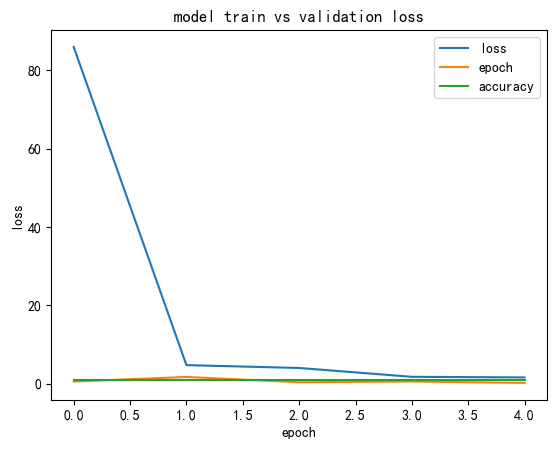

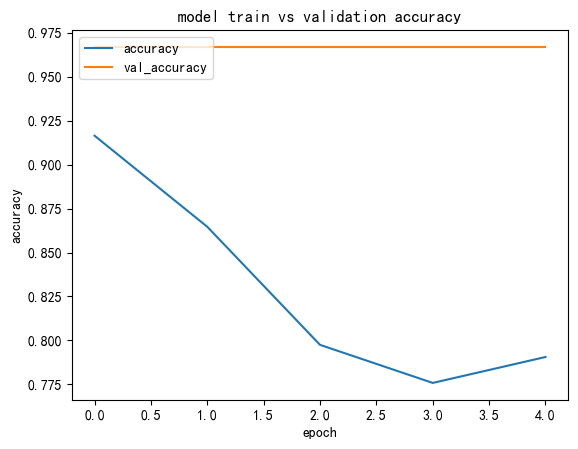

In [28]:
# display(history.history)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["val_accuracy"])
plt.title("model train vs validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "epoch", "accuracy"], loc="upper right")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model train vs validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["accuracy", "val_accuracy"], loc="upper left")
plt.show()

In [29]:
display(df22.columns)

Index(['原始重量', '稳定重量', '轴重', 'su_ad', 'wpu_x', 'wpu_y', 'wpu_z', 'su_x',
       'su_y', 'su_z', '原始重量_diff', '稳定重量_diff', '轴重_diff', 'su_ad_diff',
       'wpu_x_diff', 'wpu_y_diff', 'wpu_z_diff', 'su_x_diff', 'su_y_diff',
       'su_z_diff', '速度', '估计重量', 'label', '时间', '轨迹时间'],
      dtype='object')

In [30]:
# data22, scaler22 = normalize(df22, numeric_col_names)
# X22 = data22[feature_col_names]
# y_test22 =normalizeY( df22[label_col_names])
# x_train22  = np.asarray(X22) .reshape(-1, feature_col_num)
# predY22 = model.predict(x_train22, batch_size=batch_size)


# data23, scaler23 = normalize(df23, numeric_col_names)
# X23 = data23[feature_col_names]
# y_test23 =normalizeY( df23[label_col_names])
# x_train23  = np.asarray(X23) .reshape(-1, feature_col_num)
# predY23 = model.predict(x_train23, batch_size=batch_size)






# display(predY22,predY23)

In [31]:
# fig_acc = plt.figure(figsize=(9, 9))
# plt.plot(predY23[0:27000])
# plt.plot(y_test23[0:27000])
# plt.title("real vs pred")
# plt.ylabel("value")
# plt.xlabel("epoch")
# plt.xlim((19000, 23000))
# plt.legend(["pred", "real"], loc="upper left")
# plt.show()